#### Mengimport Library yang di perlukan

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Membaca file dataset 

In [351]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### Mengecek data duplicate

In [353]:
df.isnull().sum()


ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

#### Menghapus Kolom

In [354]:
df.drop(['ID'], axis=1, inplace=True)

#### Mengubah data kategori(object) menjadi numerik

In [355]:
from sklearn.preprocessing import LabelEncoder
col=['AGE','GENDER','RACE','INCOME','DRIVING_EXPERIENCE','EDUCATION','VEHICLE_YEAR','VEHICLE_TYPE']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

#### Menghapus Data Duplikat

In [356]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
df["ANNUAL_MILEAGE"] = imputer_mean.fit_transform(df[["ANNUAL_MILEAGE"]])

imputer_mean = SimpleImputer(strategy='mean')
df["CREDIT_SCORE"] = imputer_mean.fit_transform(df[["CREDIT_SCORE"]])

#### Melakukan normalisasi data

In [357]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['ANNUAL_MILEAGE', 'CREDIT_SCORE']] = min_max_scaler.fit_transform(df[['ANNUAL_MILEAGE', 'CREDIT_SCORE']])

#### Membersihkan Outliers

In [358]:
Q1_price = df['CREDIT_SCORE'].quantile(0.25)
price = df['CREDIT_SCORE'].quantile(0.75)
IQR = price - Q1_price
lower_bound = Q1_price - 1.5 * IQR
upper_bound = price + 1.5 * IQR
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

Q1_price = df['ANNUAL_MILEAGE'].quantile(0.25)
price = df['ANNUAL_MILEAGE'].quantile(0.75)
IQR = price - Q1_price
lower_bound = Q1_price - 1.5 * IQR
upper_bound = price + 1.5 * IQR
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


### A1 Supervised Learning Menggunakan Support Vector Classifier (dari SVM)

#### Memisahkan atribut dan label

In [359]:
X = df[['ANNUAL_MILEAGE', 'CREDIT_SCORE']]
y = df['OUTCOME']

#### Membagi data menjadi data training dan data testing

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

####  Membuat model SVC dan melatihnya dengan data training

In [361]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

#### Memprediksi data testing

In [362]:
y_pred = svm.predict(X_test)

#### Menyimpan nilai Support Vectors & Indexnya

In [363]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

### A2. Hasil prediksi

##### menampilkan matriks (confusion matrix) untuk model klasifikasi SVM (Support Vector Machine) yang telah Anda latih.

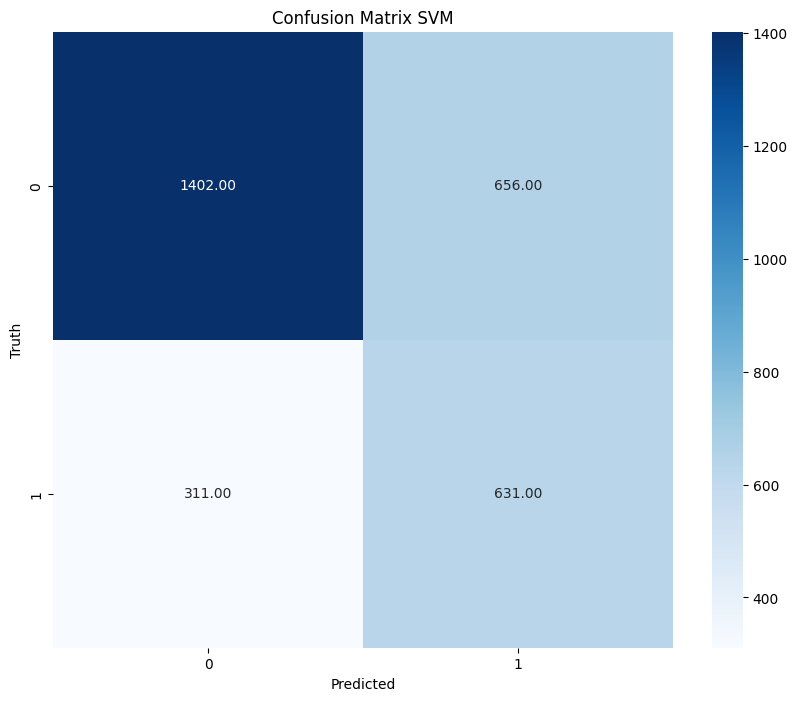

In [364]:
from sklearn.metrics import confusion_matrix, classification_report
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

##### laporan klasifikasi yang memberikan informasi rinci tentang kinerja model klasifikasi SVM pada data pengujian.

In [365]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.68      0.74      2058
         1.0       0.49      0.67      0.57       942

    accuracy                           0.68      3000
   macro avg       0.65      0.68      0.65      3000
weighted avg       0.72      0.68      0.69      3000



### A3. Buat plot untuk hasil prediksi-nya

#### Scatter plot data dengan garis batas keputusan yang memisahkan antara kelas atau label yang diberikan oleh model SVM. 

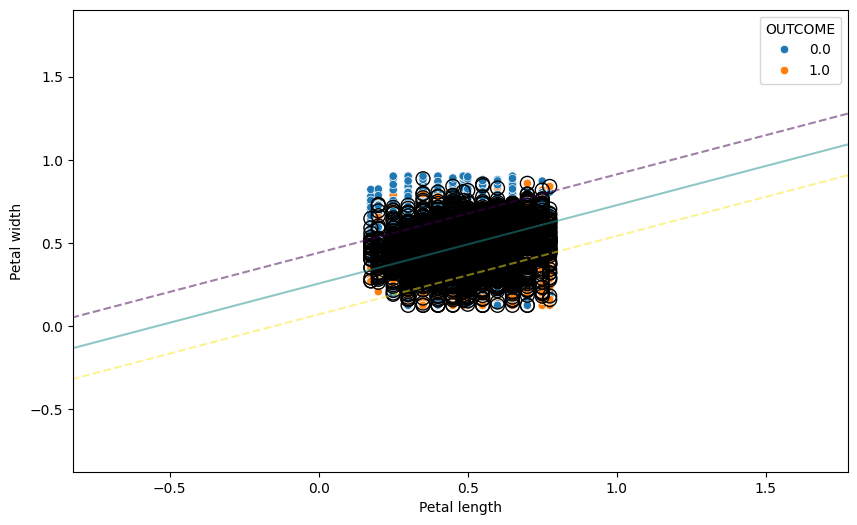

In [366]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,6))
sns.scatterplot(x='ANNUAL_MILEAGE', y='CREDIT_SCORE', hue='OUTCOME', data=df)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contour",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

### B. Unsupervised Learning

#### import library

In [367]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # SDB-CH
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

##### Model K-Means yang terlatih dengan dua cluster berdasarkan fitur "ANNUAL_MILEAGE" dan "CREDIT_SCORE" 

In [368]:
X = df[['ANNUAL_MILEAGE', 'CREDIT_SCORE']]
K = 2
kmeans = KMeans(n_clusters=K, n_init=10, init='k-means++', random_state=42) 
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

##### Untuk mengatur label cluster pada dataset  dan mengubah labelnya. 

In [369]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
df['cluster'] = df['cluster'].map(cluster_mapping)

### B2. Cluster yang telah diprediksi harus dievaluasi

#### Tanpa Label Asli

##### untuk mengukur kualitas hasil clustering:

In [370]:
ss_score = silhouette_score(X, df['cluster'])
db_index = davies_bouldin_score(X, df['cluster'])
ch_index = calinski_harabasz_score(X, df['cluster'])

#### Menampilkan Kualitas hasil Clustering

In [371]:

print(f"Silhouette Score: {ss_score:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.35
Davies-Bouldin Index: 1.11
Calinski-Harabasz Index: 6335.52


#### Dengan Label Asli

#### Buat crosstab untuk membandingkan cluster labels dengan true labels

In [372]:
cross_tab = pd.crosstab(df["cluster"], df["OUTCOME"])

#### menghitung Adjusted Rand Index (ARI) 

In [373]:
ari = adjusted_rand_score(df["OUTCOME"], df['cluster'])

##### menghitung Normalized Mutual Information (NMI) dengan menggunakan normalized_mutual_info_score() dari scikit-learn.

In [374]:
nmi = normalized_mutual_info_score(df['OUTCOME'], df['cluster'])

#### Fungsi HCV-M

In [375]:

homogeneity = homogeneity_score(df["OUTCOME"], df['cluster'])
completeness = completeness_score(df["OUTCOME"], df['cluster'])
v_measure = v_measure_score(df["OUTCOME"], df['cluster'])


#### Menampilkan 


In [376]:
print("Cross-Tabulation:")
print(cross_tab, "\n")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
OUTCOME   0.0   1.0
cluster            
0        4595  1099
1        2272  2034 

Adjusted Rand Index (ARI): 0.10
Normalized Mutual Information (NMI): 0.07
Homogeneity Score: 0.07
Completeness Score: 0.07
V-Measure Score: 0.07


### B3. Plotting Hasil Klasterisasi

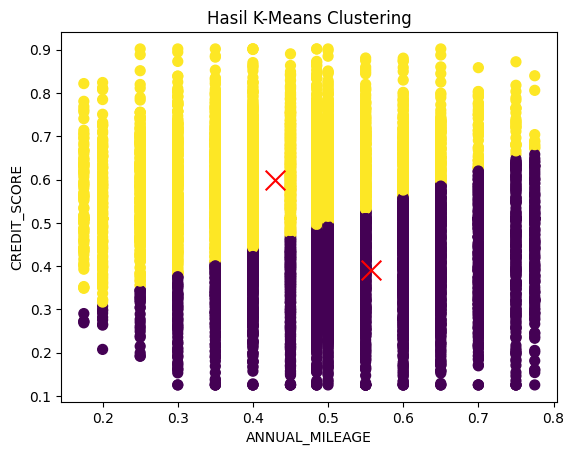

In [377]:

plt.scatter(df['ANNUAL_MILEAGE'], df['CREDIT_SCORE'], c=cluster_labels, cmap='viridis', s=50)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

plt.xlabel('ANNUAL_MILEAGE')
plt.ylabel('CREDIT_SCORE')
plt.title('Hasil K-Means Clustering')
plt.show()
